In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = tf.keras.datasets.cifar10

(x_train_val, y_train_val), (x_test, y_test) = dataset.load_data()

In [3]:
x_train_val.shape, x_train_val.dtype, x_train_val.min(), x_train_val.max()

((50000, 32, 32, 3), dtype('uint8'), np.uint8(0), np.uint8(255))

In [4]:
y_train_val.shape, y_train_val.dtype, y_train_val.min(), y_train_val.max()

((50000, 1), dtype('uint8'), np.uint8(0), np.uint8(9))

In [5]:
x_test.shape, x_test.dtype, x_test.min(), x_test.max()

((10000, 32, 32, 3), dtype('uint8'), np.uint8(0), np.uint8(255))

In [6]:
y_test.shape, y_test.dtype, y_test.min(), y_test.max()

((10000, 1), dtype('uint8'), np.uint8(0), np.uint8(9))

In [7]:
print(x_train_val.shape)
print(y_train_val.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
x_train_val, x_test = x_train_val/255.0, x_test/255.0

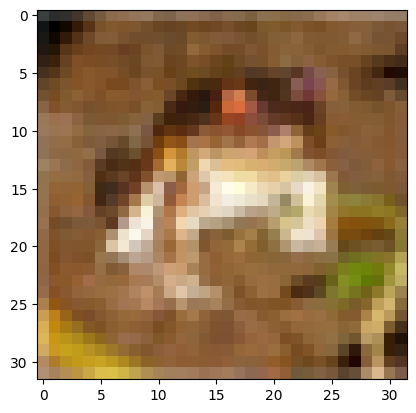

In [9]:
plt.imshow(x_train_val[0])

In [10]:
x_train_val.shape, x_train_val.dtype, x_train_val.min(), x_train_val.max()

((50000, 32, 32, 3), dtype('float64'), np.float64(0.0), np.float64(1.0))

In [11]:
y_train_val.shape, y_train_val.dtype, y_train_val.min(), y_train_val.max()

((50000, 1), dtype('uint8'), np.uint8(0), np.uint8(9))

In [12]:
x_test.shape, x_test.dtype, x_test.min(), x_test.max()

((10000, 32, 32, 3), dtype('float64'), np.float64(0.0), np.float64(1.0))

In [13]:
y_test.shape, y_test.dtype, y_test.min(), y_test.max()

((10000, 1), dtype('uint8'), np.uint8(0), np.uint8(9))

In [14]:
x_train = x_train_val[:45000]
y_train = y_train_val[:45000]
x_val = x_train_val[45000:]
y_val = y_train_val[45000:]

In [15]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(32, 32, 3),
    include_top=False,
    weights=None,
    pooling='avg'
)

In [16]:

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = "softmax")
])


In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()


In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=loss_fn,
              metrics=['accuracy'])


In [19]:
model.fit(x_train, y_train, validation_data=[x_val, y_val], epochs=20)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 29ms/step - accuracy: 0.2241 - loss: 2.3113 - val_accuracy: 0.0970 - val_loss: 2.3484
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4021 - loss: 1.7174 - val_accuracy: 0.0958 - val_loss: 2.4281
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4481 - loss: 1.5718 - val_accuracy: 0.1038 - val_loss: 2.4698
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4914 - loss: 1.4516 - val_accuracy: 0.1658 - val_loss: 2.1338
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5216 - loss: 1.3497 - val_accuracy: 0.4782 - val_loss: 1.4745
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5621 - loss: 1.2491 - val_accuracy: 0.5248 - val_loss: 1.3767
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5851 - loss: 1.1916 - val_accuracy: 0.5454 - val_loss: 1.3458
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6065 - loss:

In [20]:
model.evaluate(x_test,  y_test, verbose=2)


313/313 - 11s - 34ms/step - accuracy: 0.6486 - loss: 1.0741


[1.0740656852722168, 0.6485999822616577]